importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

Processing Collected Data

In [2]:
car_dataset = pd.read_csv('car-data.csv')

In [3]:
print(f"the first 5 row of data set : \n {car_dataset.head(5)}")

the first 5 row of data set : 
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of catagorical data 
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding The Categorical Data

In [10]:
# encoding "fuel type" column to numerical values 
car_dataset.replace({'Fuel_Type' :{'Petrol':0 , 'Diesel' : 1 , 'CNG':2}},inplace=True)
car_dataset.infer_objects(copy=False)


# encodint "Seller type" 
car_dataset.replace({'Seller_Type' : {'Dealer':0 , 'Individual':1}},inplace=True)
car_dataset.infer_objects(copy=False)


# encoding "Transmission" 
car_dataset.replace({'Transmission' : {'Manual': 0 ,'Automatic':1}},inplace=True)
car_dataset.infer_objects(copy=False)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [8]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting target and features

In [9]:
# selling price is our target y 
# we remove Car_Name from the features 

X = car_dataset.drop(['Car_Name' , 'Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [22]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [10]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting  training and test data

In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.1 ,random_state=2 )

Model Training

In [12]:
# linear regression 
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation 

In [13]:
# prediction on training data 
Training_data_prediction = linear_reg_model.predict(X_train)

In [14]:
# comparing prediction of the model to actual target 
error_score = metrics.r2_score(Y_train , Training_data_prediction)
print(error_score)

0.8799451660493699


plotting the actual prices vs predicted prices

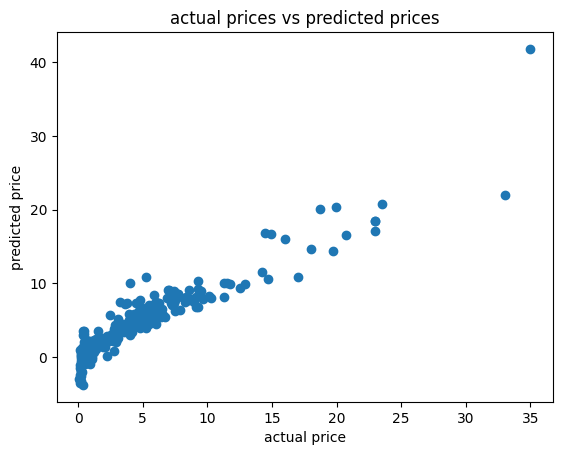

In [16]:
plt.scatter(Y_train,Training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [17]:
# prediction on test set
test_data_prediction = linear_reg_model.predict(X_test)

In [18]:
# comparing prediction of the model to actual target on test set
error_score = metrics.r2_score(Y_test , test_data_prediction)
print(error_score)

0.8365766715026473


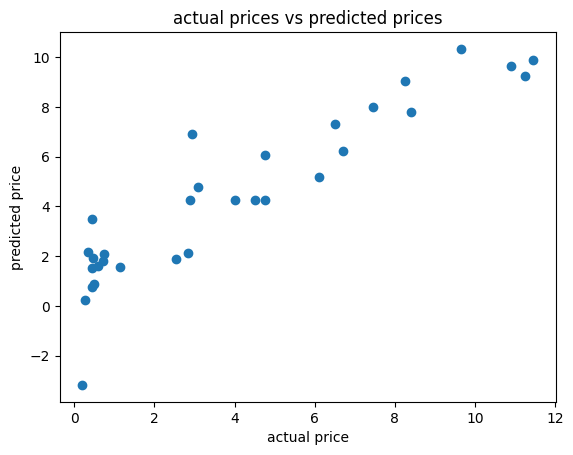

In [19]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

Model training

In [20]:
# lasso regression 
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [21]:
training_data_prediction_2 = lasso_reg_model.predict(X_train)

In [22]:
error_score_2 = metrics.r2_score(Y_train,training_data_prediction_2)
print(error_score_2)

0.8427856123435795


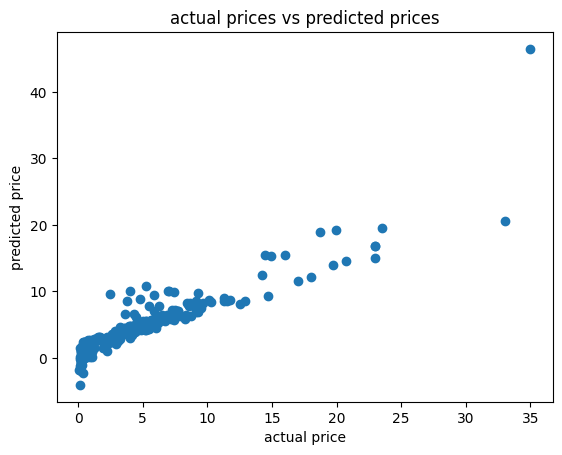

In [24]:
plt.scatter(Y_train,training_data_prediction_2)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [26]:
# prediction on test set
test_data_prediction2 = lasso_reg_model.predict(X_test)

In [29]:
error_score2 = metrics.r2_score(Y_test,test_data_prediction2) 
print(error_score2)

0.8709167941173201


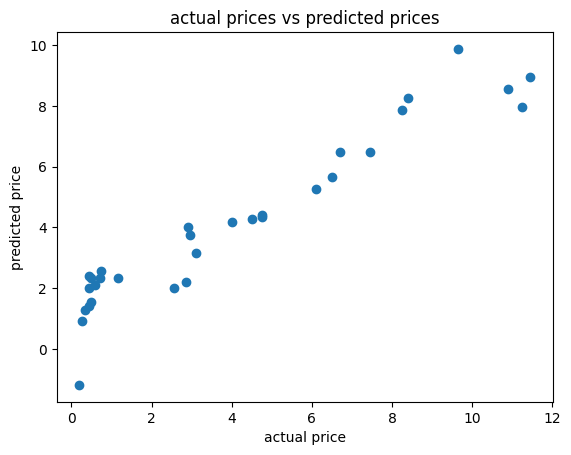

In [31]:
plt.scatter(Y_test,test_data_prediction2)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()